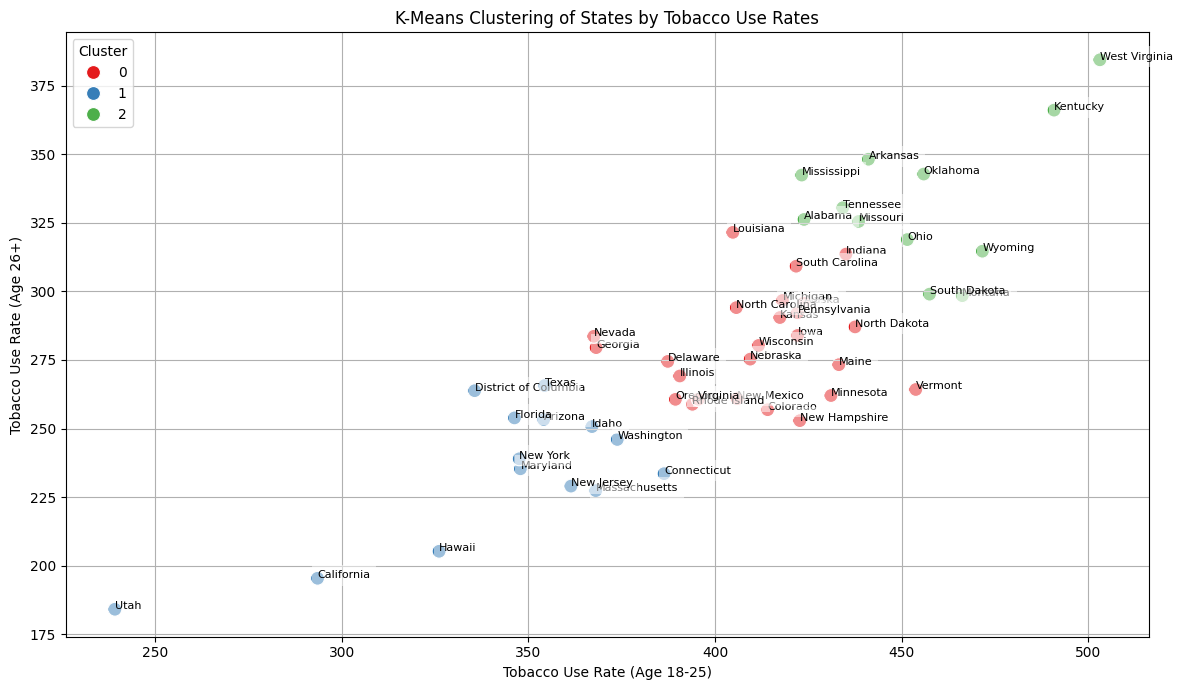

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("drugs.csv")


# Select relevant columns for clustering
rate_columns = [
    'Rates.Tobacco.Use Past Month.12-17',
    'Rates.Tobacco.Use Past Month.18-25',
    'Rates.Tobacco.Use Past Month.26+'
]

# Group by state to get average rates (if multiple years per state)
df_grouped = df.groupby("State")[rate_columns].mean().reset_index()

# Normalize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped[rate_columns])

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize with a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Rates.Tobacco.Use Past Month.18-25',
    y='Rates.Tobacco.Use Past Month.26+',
    hue='Cluster',
    data=df_grouped,
    palette='Set1',
    s=100
)

# Annotate points with state names without overlap
for i in range(df_grouped.shape[0]):
    plt.text(
        x=df_grouped['Rates.Tobacco.Use Past Month.18-25'][i],
        y=df_grouped['Rates.Tobacco.Use Past Month.26+'][i],
        s=df_grouped['State'][i],
        fontdict=dict(color='black', size=8),
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
    )

plt.title('K-Means Clustering of States by Tobacco Use Rates')
plt.xlabel('Tobacco Use Rate (Age 18-25)')
plt.ylabel('Tobacco Use Rate (Age 26+)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()
